# TP 3: Équation de la chaleur en 1D

$$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\left\Vert#1\right\Vert}
\newcommand{\eps}{\varepsilon}$$
On s'intéresse à la résolution numérique de l'équation de la chaleur sur $[0,T]\times [0,1]$ avec une conductivité thermique $a\in \mathcal{C}^1([0,1]), a > 0$, et une source de chaleur continue, $f \in \mathcal{C}^0([0,1])$. On considèrera l'équation avec conditions de Dirichlet:

$$
(DD)\quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) = \frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(t,x)\right) + f(x)  \hbox{ sur } ]0,1[\times ]0,T]\\
&u(t,0) = u(t,1) = 0 \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right. 
$$

On commence par importer les modules et définir les fonctions $f$,$a$ et $u_0$:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def f(x):
    fx = np.zeros(len(x))
    fx[np.logical_and(x>.8,x<.9)] = 1.
    return fx
def u0(x):
    fx = np.zeros(len(x))
    fx[x < .2] = 1.
    return fx


## 1. Conductivité constante: comparaison des schémas implicites et explicites
Dans cette partie, on s'intéresse au cas plus simple où la conductivité est constante, $a \equiv 1$.  On considère $x = (x_0,\dots,x_{M+1})$ une grille uniforme dans $[0,1]$ de pas $h=1/(M+1)$ et $t = (t_0,\dots,t_N)$ une grille uniforme dans $[0,T]$ de pas $\tau = 1/N$. On note également $u_{j}^n \simeq u(x_j,t_n)$ l'approximation discrète de la solution du système. Les schémas explicites et implicites pour l'équation de la chaleur avec conditions de Dirichlet s'écrivent:

$$
(DD,\mathrm{expl}) \quad \left\{\begin{aligned}
& \frac{1}{\tau} (u_{j}^{n+1} - u_j^n) = \frac{1}{h^2} (u_{j-1}^n - 2 u_j^{n} + u_{j+1}^n) + f_j &\hbox{ pour } 1\leq j \leq M, 0\leq n \leq N-1\\
& u_0^n = u_{M+1}^n = 0 &\hbox{ pour } 0\leq n\leq N \\
& u_j^0 = u_0(x_j) &\hbox{ pour } 1\leq j\leq M+1
\end{aligned}\right. 
$$

$$
(DD,\mathrm{impl}) \quad \left\{\begin{aligned}
& \frac{1}{\tau} (u_{j}^{n+1} - u_j^n) = \frac{1}{h^2} (u_{j-1}^{n+1} - 2 u_j^{n+1} + u_{j+1}^{n+1}) + f_j &\hbox{ pour } 1\leq j \leq M, 0\leq n \leq N-1\\
& u_0^n = u_{M+1}^n = 0 &\hbox{ pour } 0\leq n\leq N \\
& u_j^0 = u_0(x_j) &\hbox{ pour } 1\leq j\leq M+1
\end{aligned}\right. 
$$


**Q1)** En notant $U^n = (u_1^n,\dots,u^n_M)$ et $F = (f_1^n,\dots,u^n_M)$, montrer que les deux schémas peuvent être mis sous forme matricielle:

$$\begin{aligned}
&U^{n+1} = \left(\mathrm{Id}_M + \frac{\tau}{h^2} L_{D} \right) U^n + \tau F  &\hbox{ pour  } (DD,\mathrm{expl})\\ 
%& \tilde{u}^{n+1} = \left(\mathrm{Id}_M + \frac{\tau}{h^2} L_{N} \right) \tilde{u}^n + \tau \tilde{f}&\hbox{ pour  }
%(DN,\mathrm{expl})\\ 
& U^{n+1} = \left(\mathrm{Id}_M - \frac{\tau}{h^2} L_{D} \right)^{-1} (U^n + \tau F) &\hbox{ pour  }
(DD,\mathrm{impl})\\ 
%& \tilde{u}^{n+1} = \left(\mathrm{Id}_M - \frac{\tau}{h^2} L_{N} \right)^{-1} (\tilde{u}^n + \tau \tilde{f}) &\hbox{ pour  } (DN,\mathrm{impl})
\end{aligned}$$

où la matrice $L_{D}$ est à déterminer.

**Q2)** Écrire une fonctions $LD(M)$ calculant la matrice $L_D$. (on pourra s'aider de la fonction np.diag, qui construit une matrice diagonale, sur-diagonale ou sous-diagonale à partir d'un vecteur, et/ou np.eye, qui construit la matrice identité).


In [3]:

def LD(M):
    L = np.diag(np.ones(M-1),1)-2*np.eye(M)+np.diag(np.ones(M-1),-1)
    return L
def LN(M):
    L = LD(M)
    L[0,0] = -1
    L[M-1,M-1] = -1
    return L
print(np.linalg.eigvals(LN(10)))


[-3.90211303e+00 -3.61803399e+00 -3.17557050e+00 -2.61803399e+00
 -2.00000000e+00 -1.38196601e+00 -8.24429495e-01  9.97909443e-17
 -9.78869674e-02 -3.81966011e-01]


**Q3)** Tracer sur une même figures les itérées pour $(DD,\mathrm{expl})$ pour $M=49$ et $N=500$ et $T=0.1$. Recommencer avec $N=498$. Calculer les valeurs propres de $\mathrm{Id}_M + \frac{\tau}{h^2} L_D$ (via la fonction *np.linalg.eigvals*), et interpréter l'explosion constatée numériquement.

**Rappel: ** le produit matrice vecteur s'effectue via la fonction *np.dot(A,x)*

[-9.98026728e-01 -9.92114701e-01 -9.82287251e-01 -9.68583161e-01
 -9.51056516e-01 -9.29776486e-01 -9.04827052e-01 -8.76306680e-01
 -8.44327926e-01 -8.09016994e-01 -7.70513243e-01 -7.28968627e-01
 -6.84547106e-01 -6.37423990e-01 -5.87785252e-01 -5.35826795e-01
 -4.81753674e-01 -4.25779292e-01 -3.68124553e-01 -3.09016994e-01
 -2.48689887e-01 -1.87381315e-01 -1.25333234e-01 -6.27905195e-02
  1.25743468e-16  6.27905195e-02  1.25333234e-01  1.87381315e-01
  2.48689887e-01  3.09016994e-01  3.68124553e-01  4.25779292e-01
  4.81753674e-01  5.35826795e-01  5.87785252e-01  6.37423990e-01
  6.84547106e-01  7.28968627e-01  7.70513243e-01  8.09016994e-01
  8.44327926e-01  8.76306680e-01  9.04827052e-01  9.29776486e-01
  9.51056516e-01  9.68583161e-01  9.82287251e-01  9.92114701e-01
  9.98026728e-01]


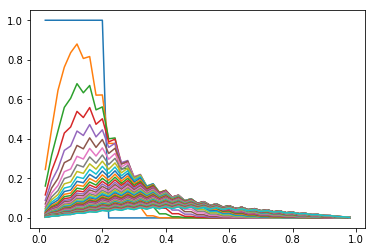

In [5]:
M = 49
N = 500
T = .1
h = 1.0/(M+1)
tau = T/N

L = LD(M)/(h*h)
x = np.linspace(0+h,1-h,M)
u = u0(x)
for i in range(N-1):
    if i%10 == 0:
        plt.plot(x,u)
    u = u + tau*np.dot(L,u)

    
print(np.sort(np.linalg.eigvalsh(np.eye(M)+tau*L)))


**Q4)** Réaliser les mêmes calculs via la méthode implicite toujours pour les conditions de Dirichlet, en prenant $M=49$,  $N=50$, et $T=0.1$. 

[-18.98026728 -18.92114701 -18.82287251 -18.68583161 -18.51056516
 -18.29776486 -18.04827052 -17.7630668  -17.44327926 -17.09016994
 -16.70513243 -16.28968627 -15.84547106 -15.3742399  -14.87785252
 -14.35826795 -13.81753674 -13.25779292 -12.68124553 -12.09016994
 -11.48689887 -10.87381315 -10.25333234  -9.6279052   -9.
  -8.3720948   -7.74666766  -7.12618685  -6.51310113  -5.90983006
  -5.31875447  -4.74220708  -4.18246326  -3.64173205  -3.12214748
  -2.6257601   -2.15452894  -1.71031373  -1.29486757  -0.90983006
  -0.55672074  -0.2369332    0.04827052   0.29776486   0.51056516
   0.68583161   0.82287251   0.92114701   0.98026728]


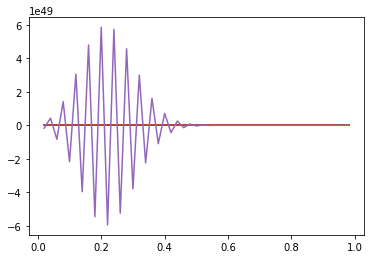

In [6]:
M = 49
N = 50
T = 0.1
h = 1.0/(M+1)
tau = T/N


L = LD(M)/(h*h)
x = np.linspace(0+h,1-h,M)
u = u0(x)
for i in range(N-1):
    if i%10 == 0:
        plt.plot(x,u)
    u = u + tau*np.dot(L,u)

    
print(np.sort(np.linalg.eigvalsh(np.eye(M)+tau*L)))


Dans les question 5 à 8, on montre la convergence du schéma implicite.

**Q5)** Démontrer que sous la condition $\frac{\tau}{h^2} \leq \frac{1}{2}$, si $V = (\mathrm{Id}_M + \frac{\tau}{h^2} L_D) U$, alors 

$$\min_{1\leq j \leq M} U_j \leq \min_{1\leq j \leq M} V_j \hbox{ et } \max_{1\leq j \leq M} V_j \leq \max_{1\leq j \leq M} U_j,$$

*(Indication: montrer que sous la condition mentionnée, $V_j$ est combinaison convexe des coefficients de $U$)*

**Q6)** On note maintenant
$\Phi^{\mathrm{exp}}: U\in \Rsp^M \mapsto \left(\mathrm{Id}_M + \frac{\tau}{h^2}L_D\right) U + \tau F $. Déduire de la question précédente que 

$$ \nr{\Phi^{\mathrm{exp}}(U) - \Phi^{\mathrm{\exp}}(V)}_\infty \leq \nr{U - V}_\infty$$

(Le schéma $(DD,\mathrm{exp})$ est donc stable en norme infinie sous la condition $\frac{\tau}{h^2} \leq \frac{1}{2}$.)

**Q7)** Soit $\bar{U}^n = (u(t_n,x_1), \dots, u(t_n,x_M)) \in \Rsp^M$ où $u \in \mathcal{C}^4([0,T]\times [0,1])$ est solution de (DD). Démontrer que

$$ \nr{\frac{\bar{U}^{n+1} - \Phi^{\mathrm{exp}}(\bar{U}^n)}{\tau}}_\infty \leq C(\tau + h^2) $$

**Q8)** Soit $U^0 = \bar{U}^0$ et $U^{n+1} = \Phi^{\mathrm{exp}}(U^n)$. On pose $\eps_n := \nr{U^n - \bar{U}^n}_\infty$. Démontrer que $\eps_n$ vérifie l'inégalité

$$ \eps_{n+1} \leq C\tau(\tau + h^2) + \eps_n. $$

En déduire que $\eps_n \leq CT (\tau +h^2)$ pour $0\leq n\leq N$.

**Q9**) Démontrer que si $ (\mathrm{Id}_M - \frac{\tau}{h^2} L_D) V = U$, alors 

$$\min_{1\leq j \leq M} U_j \leq \min_{1\leq j \leq M} V_j \hbox{ et } \max_{1\leq j \leq M} V_j \leq \max_{1\leq j \leq M} U_j,$$

*(Indication: pour la première inégalité, raisonner à partir de $j_0 = \arg\min_{j}V_j$)*

En déduire que l'application linéaire $ (\mathrm{Id}_M - \frac{\tau}{h^2} L_D)$ est inversible, puis que si l'on pose $\Phi^{\mathrm{imp}}: U\in \Rsp^M \mapsto \left(\mathrm{Id}_M - \frac{\tau}{h^2}\right)^{-1} (U + \tau F),$ alors 

$$\nr{\Phi^{\mathrm{imp}}(U) - \Phi^{\mathrm{imp}}(V)}_\infty \leq \nr{U-V}_\infty.$$ 

Le schéma $(DD,\mathrm{impl})$ est  donc stable pour la norme infinie sans hypothèse sur $\tau$ et $h$: on parle de *stabilité inconditionnelle*. On pourrait montrer qu'il est convergent, et que son erreur est du même ordre que pour le schéma implicite.


## 3. Cas de la conductivité variable

On s'intéresse à une équation de diffusion sans second membre ($f=0$) mais avec une conductivité variable: 

$$
(DA) \quad \left\{\begin{aligned}
&\frac{\partial u}{\partial t}(t,x) = \frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(t,x)\right) + f(x)  \hbox{ sur } ]0,1[\times ]0,T]\\
&u(t,0) = 0 \hbox{ et } u(t,1) = 0 \hbox{ pour } t\in [0,T]\\
&u(0,\cdot) = u_0
\end{aligned}\right. 
$$

Comme auparavant, on considère une discrétisation $x_0 = 0,\dots, x_{M+1}=1$ du segment $[0,1]$, mais pour la construction du schéma on utilisera  également les points situé au milieu des points de maille, $x_{i+\frac12} := x_i + h/2$ où $h= 1/(M+1)$. Si $u$ est une fonction de classe $\mathcal{C}^3$, alors 

$$ \frac{\partial u}{\partial x} (x_{j+\frac12}) = \frac{1}{h} (u(x_{j+1}) - u(x_j)) + \mathrm{O}(h^2).$$

Ceci suggère la discrétisation suivante de l'opérateur de diffusion,

$$
\begin{align*}
\left.\frac{\partial}{\partial x}\left(a(x) \frac{\partial u}{\partial x}(t,x)\right)\right|_{t=t_n,x=x_j} 
&\simeq \frac{1}{h} \left(a\left(x_{j+\frac12}\right) \frac{\partial u}{\partial x}(t_n,x_{j+\frac12}) -  a\left(x_{j-\frac12}\right)\frac{\partial u}{\partial x}(t_n,x_{j+\frac12})\right) \\
&\simeq \frac{1}{h} \left(a\left(x_{j+\frac12}\right) \frac{u_{j+1}^n - u_j^{n}}{h} -  a\left(x_{j-\frac12}\right) \frac{u_{j}^n - u_{j-1}^{n}}{h}\right)
\end{align*}$$

Finalement, avec une discrétisation implicite en temps et en posant $a_{i+\frac12} = a(x_{i+\frac12})$, on obtient
 
$$ 
(DA,{\mathrm{imp}}) \quad \left\{
\begin{aligned} 
&\frac{1}{\tau}(u_{j}^{n+1} - u_j^n) = \frac{1}{h^2} \left(a_{j-\frac12} u_{j-1}^{n+1} + a_{j+\frac12} u_{j+1}^{n+1} - (a_{j-\frac12}+a_{j+\frac12}) u_{j}^{n+1})\right) &\hbox{ pour } 0\leq n < T \hbox{ et } 1\leq j\leq M   \\
&u_0^n = 0,~~ u_{M+1}^n = 1 & \hbox{ pour } 0\leq n \leq T\\
&u_0^j = u_0(x_j) &\hbox{ pour } 0\leq j \leq M+1
\end{aligned}
\right. 
$$

**Q10)** Écrire le schéma sous la forme $(\mathrm{Id}_M - \frac{\tau}{h^2} L_A) U^{n+1} = U^n$, où $U^n = (u_1^n,\dots,u_M^n)$ et où la matrice $L_A$ est à déterminer.

**Q11)** Montrer que si $(\mathrm{Id}_M - \frac{\tau}{h^2} L_A) V = U$, et si $a \geq a_0 > 0$, alors  $\nr{V}_\infty\leq \nr{U}_\infty$. En déduire l'inversibilité de $(\mathrm{Id}_M - \frac{\tau}{h^2} L_A),$ et montrer que si l'on note 
$\Phi^{\mathrm{imp}}_A(U) = (\mathrm{Id}_M - \frac{\tau}{h^2} L_A)^{-1} U$, alors 
$$ \nr{\Phi^{\mathrm{imp}}_A(U) - \Phi^{\mathrm{imp}}_A(V)}_\infty \leq \nr{U - V}_\infty. $$


**Q12)** Soit $u\in\mathcal{C}^4([0,1]\times [0,T])$ une solution de l'équation (DA), où l'on a supposé $a \in \mathcal{C}^\infty([0,1])$, et soit $\bar{U}^n = (u(x_1),\dots,u(x_M))$. Démontrer la consistance du schéma, et plus précisément que

$$\nr{\frac{\bar{U}^{n+1} - \Phi^{\mathrm{impl}}_A(\bar{U}^n)}{\tau}} \leq C(\tau + h)$$

(On peut même améliorer la borne en $C(\tau+h^2)$, en faisant un DL à l'ordre 4 en espace.)

**Q13)**  Faire les calculs pour  $M=10$, $N=50$, $T=.2$, $u(0,\cdot) = u_0$ et pour deux profils de conductivité $a_0$ et $a_1$ (voir ci-dessous). Comparer les deux distributions finales de température en $T=.2$ pour les deux profils de conductivité, interpréter.


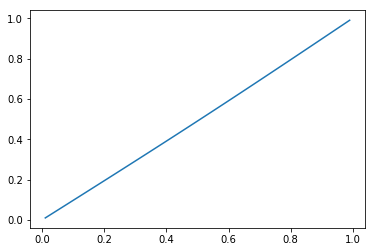

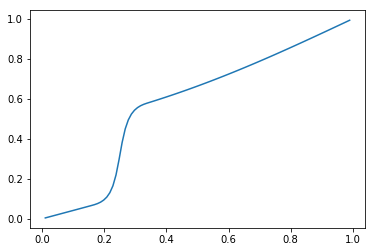

In [7]:
def a0(x): 
    return np.ones(len(x))
def eta(x):
    e = np.exp(-1.0/(1.0-x*x))
    e[np.abs(x) > 1] = 0
    return e/np.exp(-1.0)
def a1(x): 
    return 1.0-0.95*eta((x-.25)*10.0)
def H(x):
    h = 0.01
    return 1/(1+np.exp(-x/h))
def u0(x): # approximation d'un créneau
    return H(x-.4) - H(x-.7)

M = 100
N = 50
T = .2
h = 1.0/(M+1)
tau = T/N

xh = np.linspace(h/2, 1-h/2, M+1)
x = np.linspace(0+h,1-h,M)
ah0 = a0(xh)
ah1 = a1(xh)


L0 = tau/(h*h) * (- np.diag(ah0[0:-1] + ah0[1:],0) + np.diag(ah0[1:-1],-1) + np.diag(ah0[1:-1],1))
v0 = np.zeros(M) 
v0[-1] = 1*ah0[-1]*tau/(h*h)
u = u0(x)
for i in range(N-1):
    u = np.linalg.solve(np.eye(M) - L0, u + v0)
plt.plot(x,u)
plt.show()

L1 = tau/(h*h) * (- np.diag(ah1[0:-1] + ah1[1:],0) + np.diag(ah1[1:-1],-1) + np.diag(ah1[1:-1],1))
v1 = np.zeros(M) 
v1[-1] = ah1[-1]*tau/(h*h)
u = u0(x)
for i in range(N-1):
    u = np.linalg.solve(np.eye(M) - L1, u + v1)
plt.plot(x,u)
plt.show()

